# MountainCar Environment

Exploring the MountainCar environment from the Open Gym library

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

import gym                                      # библиотека OpenAI Gym
env = gym.make('MountainCar-v0')                # создать среду CartPole-v1

## Plotting of machine trajectories

In [2]:
class MountainCar:
    def __init__(self, goal_velocity=0):
        self.min_position  = -1.2
        self.max_position  = 0.6
        self.max_speed     = 0.07
        self.goal_position = 0.5
        self.goal_velocity = goal_velocity

        self.low  = np.array([self.min_position, -self.max_speed], dtype=np.float32)
        self.high = np.array([self.max_position,  self.max_speed], dtype=np.float32)

        self.force   = 0.001
        self.gravity = 0.0025        

    def step(self, action: int):
        position, velocity = self.state

        velocity += (action - 1) * self.force + math.cos(3 * position) * (-self.gravity)
        velocity = np.clip(velocity, -self.max_speed, self.max_speed)
        position += velocity
        position = np.clip(position, self.min_position, self.max_position)
        if position == self.min_position and velocity < 0:
            velocity = 0

        done = bool(position >= self.goal_position and velocity >= self.goal_velocity)

        self.state = (position, velocity)
        return np.array(self.state, dtype=np.float32), done

In [ ]:
obs = env.reset()                               # начальное наблюдение системы
for i in range(1000):                           # 1000 временных шагов
    action = 2                                  # всегда вправо
    obs, rew, done, _ = env.step(action)        # сделать действие и получить информацию
    #env.render()                               # нарисовать видео    

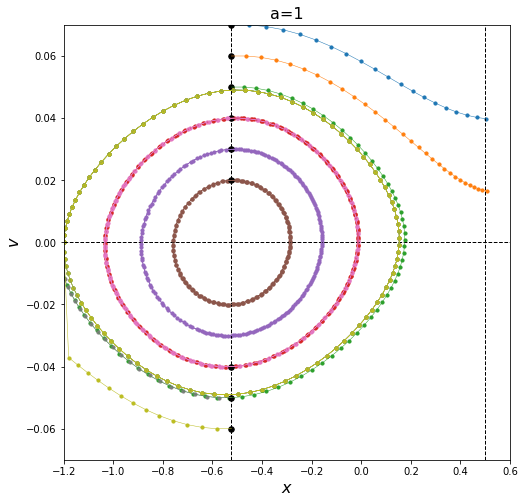

In [63]:
env = MountainCar()
X, V = [], []

m = -math.pi/6
startX = np.array([    m, m,     m,      m,    m,   m, m,  m,  m])  #np.linspace(-0.6, 0.5, 10)
startV = np.array([ 0.07, 0.06, 0.05,  0.04,  0.03, 0.02, -0.04, -0.05, -0.06])  #np.full( (len(startX),),  0.07)

for i in range(len(startX)):
    x, v = startX[i], startV[i]
    X.append([])
    V.append([])
    X[-1].append(x)
    V[-1].append(v)
    env.state = (x, v)
    for _ in range(200):
        obs, done = env.step(1)     # сделать действие и получить информацию
        x, v = obs
        X[-1].append(x)
        V[-1].append(v)
        if done:
            break
        env.state = obs

plt.figure(figsize=(8,8)) 
plt.xlim(-1.2, 0.6)
plt.ylim(-0.07, 0.07)
plt.axhline(0, linestyle='--', c='black', linewidth=1)
plt.axvline(0.5, linestyle='--', c='black', linewidth=1)
plt.axvline(-math.pi/6, linestyle='--', c='black', linewidth=1)
plt.xlabel(r'$x$',  {'fontsize': 16})  
plt.ylabel(r'$v$',  {'fontsize': 16}) 
plt.title ('a=1',   {'fontsize': 16})

for i in range(len(X)):
    plt.plot    (X[i], V[i], linewidth=0.5)   
    plt.scatter (X[i], V[i], s=10)  
    plt.scatter (X[i][0], V[i][0], color="black", s=30)  

plt.show()


In [77]:
env = gym.make('MountainCar-v0')                # создать среду CartPole-v1

def policy(state):
    return 2*int(state[1] > 0)                 # выбрать случайное действие

def run():
    tot_rew = 0                                 # суммарная награда
    
    state = env.reset()                         # начальное состояние    
    for it in range(10000):       
        action = policy(state)                  # выбираем действие
        state, rew, done, _ = env.step(action)  # совершаем действие     
        tot_rew += rew         
        if done:                                # окончание сессии
            break
            
    return tot_rew                              # длина сессии

def statistics(episodes = 1000):
    rews = np.empty(episodes)                  # награды каждой сессии
    
    for episode in range(episodes):               # проводим num_games сессий
        rews[episode] = run()
        
    mean, std = rews.mean(), rews.std()            
    print(f"rew = {mean:.1f} ± {std/np.sqrt(episodes):.0f} std = {std:.0f}")
    
    return mean, std                            # статистики наград (среднее и отклонение)


In [80]:
statistics(100)

rew = -130.2 ± 3 std = 33


(-130.25, 32.58385336328409)